# Assignment 3

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error

In [251]:
col_names = ['X','Y']
df = pd.read_csv('data2.txt',names=col_names)
df.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Section 1 - Plot the data

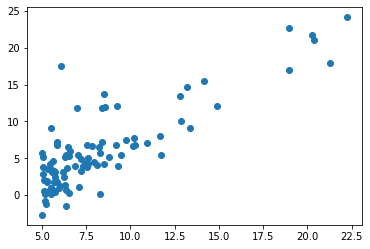

In [252]:
plt.scatter(df['X'],df['Y'])
plt.show()

# Section 2 - Find coefficients using Normal equation

The coefficients are -3.8957808783118786 and 1.1930336441895957


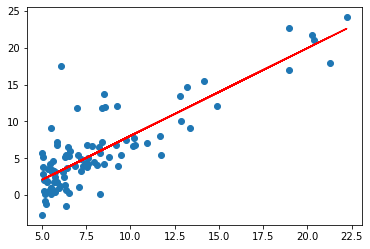

In [253]:
X_p = np.c_[np.ones((97,1)),df['X']]
theta_best = np.linalg.inv(X_p.T.dot(X_p)).dot(X_p.T).dot(df['Y'])
X_true = df['X'].values
Y_true = df['Y']
Y_pred = theta_best[0] + theta_best[1]*X_true 
print("The coefficients are",theta_best[0],"and",theta_best[1])
plt.scatter(df['X'],df['Y'])
plt.plot(X_true,Y_pred,'r-')
plt.show()

# Gradient Descent using batch and stochastic modes 

### Splitting dataset into 80% training data and 20% testing data

In [254]:
#Section3 
m =len(X_true)
x = df['X'].values
y = df['Y'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


### Defining batch gradient descent function

In [255]:
def batch_gradient_descent(x, y_true, epochs, learning_rate):

    cost_list = []
    epoch_list=[]
    b_list=[]
    number_of_features = 1
    
    w = 1
    b = 1
    total_samples = x.shape[0]
    
    for i in range(epochs):
        
        y_pred = np.dot(w, x) + b
        
        w_grad = -(2/total_samples)*(x.dot(y_true-y_pred))
        b_grad = -(2/total_samples)*np.sum(y_true-y_pred)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_pred))
        
        #print("Iteration no",i,"and the cost is",cost)
        
        b_list.append(b)
        cost_list.append(cost)

        epoch_list.append(i)
            
    return w ,  b , cost , cost_list , epoch_list , b_list


In [256]:
w,b,cost,cost_list,epoch_list,b_list = batch_gradient_descent(x_train,y_train,7000,0.001)
print("The coefficients are",b,"and",w)

The coefficients are -4.181538699485347 and 1.231141365391317


#### Graph for MSE vs ITERATIONS - BATCH GRADIENT DESCENT

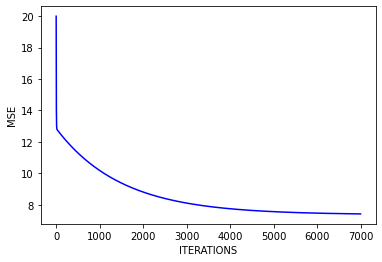

In [257]:
plt.xlabel("ITERATIONS")
plt.ylabel("MSE")
#plt.ylim(7,12)
plt.plot(epoch_list, cost_list, 'b-')

#### FOR TERMINATING CONDITION - In batch gradient descent, it has been observed that after a certain number of iterations the algorithm reaches a minima and no great change is seen on further increasing the number of iterations.

#### Calculating MSE for test data - BATCH GRADIENT DESCENT

In [258]:
y_predicted = np.dot(w,x_test.T) + b
mse = np.mean(np.square(y_test-y_predicted))
print("The MSE for test data is",mse)  


The MSE for test data is 14.957069542833812


#### Plotting graph for MSE (test data) vs Learning Rate - BATCH GRADIENT DESCENT

Text(0, 0.5, 'MSE for Test data')

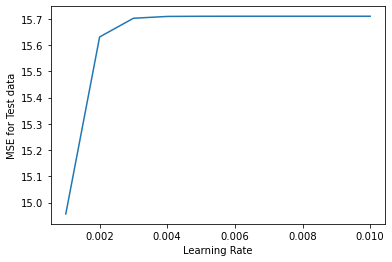

In [259]:
learning_rate_list=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
mse_list=[]
for l in learning_rate_list:
    w,b,cost,cost_list,epoch_list,b_list = batch_gradient_descent(x_train,y_train,7000,l)
    y_predicted = np.dot(w,x_test.T) + b
    mse_temp = np.mean(np.square(y_test-y_predicted))
    mse_list.append(mse_temp)

plt.plot(learning_rate_list,mse_list)
plt.xlabel("Learning Rate")
plt.ylabel("MSE for Test data")

#### We can interpret from the above graph that the best learning rate is 0.001

### Defining function for STOCHASTIC GRADIENT DESCENT

In [265]:
def stochastic_gradient_descent(x,y_true,epochs,learning_rate):
    
    cost_list = []
    epoch_list=[]
    w_list=[]
    cost_temp = 0
    
    w = 1
    b = 1
    total_samples = x.shape[0]
    
    for i in range(epochs):
        for j in range(total_samples):
            random_index =  random.randint(0,total_samples-1)
            sample_x = x[random_index]
            sample_y = y_true[random_index]
        
        #print(sample_x)
        
            y_pred = w * sample_x + b
            
            w_grad = -(2)*(sample_x*(sample_y-y_pred))
            b_grad = -(2)*(sample_y-y_pred)
        #print(w_grad)
            w =  w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            
            cost_temp += np.mean(np.square(y_true-y_pred))
        
        cost = cost_temp/len(x)
        cost_list.append(cost)
        epoch_list.append(i)
        cost_temp = 0
        
        
    return w , b , cost, cost_list , epoch_list
    

In [266]:
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(x_train,y_train,7000,0.001)
print("The coefficients are",b_sgd,"and",w_sgd)

The coefficients are -4.65814109495813 and 1.293659758698702


#### Graph for MSE vs ITERATIONS - STOCHASTIC GRADIENT DESCENT

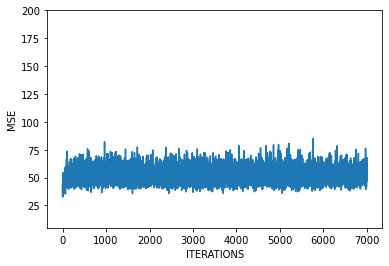

In [267]:
plt.xlabel("ITERATIONS")
plt.ylabel("MSE")
plt.ylim(5,200)
plt.plot(epoch_list_sgd,cost_list_sgd)


#### CALCULATING MSE FOR TEST DATA - STOCHASTIC GRADIENT DESCENT

In [268]:
y_predicted_sgd = np.dot(w_sgd,x_test.T) +b_sgd
mse = np.mean(np.square(y_test-y_predicted_sgd))
print("MSE FOR TEST DATA USING STOCHASTIC GRADIENT DESCENT - ",mse)  

MSE FOR TEST DATA USING STOCHASTIC GRADIENT DESCENT -  15.729952605932969


#### PLOTTING GRAPH FOR MSE (TEST DATA) VS LEARNING RATE - STOCHASTIC GRADIENT DESCENT

Text(0, 0.5, 'MSE')

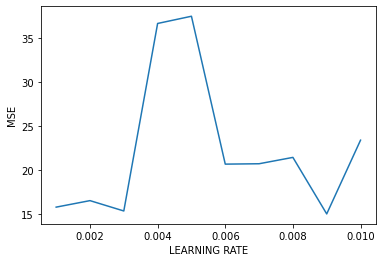

In [269]:
mse_list_sgd=[]
learning_rate_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
for i in learning_rate_list:
    w_sgd,b_sgd,cost,cost_list,epoch_list = stochiastic_gradient_descent(x_train,y_train,7000,i)
    y_predicted_sgd = np.dot(w_sgd,x_test.T) + b_sgd
    mse_temp = np.mean(np.square(y_test-y_predicted_sgd))
    mse_list_sgd.append(mse_temp)

plt.plot(learning_rate_list,mse_list_sgd)
plt.xlabel("LEARNING RATE")
plt.ylabel("MSE")

#### We can interpret from the above graph that the best learning rate can be considered between 0.001 to 0.003

##### Accuracy - BATCH GRADIENT DESCENT gives a more accurate/optimal solution than STOCHASTIC. The batch method iterates over the entire dataset for each iteration whereas stochastic chooses a data point randomly. Hence this affects the accuracy of the method

##### Speed of convergence - STOCHASTIC GRADIENT DESCENT is faster than BATCH. As the stochastic method chooses a random data point rather than going through the entire dataset.

##### CONCLUSION - 
##### BATCH GRADIENT DESCENT 
##### 1) SLOW AND HENCE NOT SUGGESTED FOR LARGER DATASETS 
##### 2) GIVES OPTIMAL SOLUTION, IF GIVEN SUFFICIENT TIME TO CONVERGE  
##### STOCHASTIC GRADIENT DESCENT
##### 1) FAST AND HENCE CAN BE USED FOR LARGER DATASETS
##### 2) GIVES GOOD SOLUTION BUT NOT OPTIMAL
